In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [2]:
h = 6.62607015e-34 #Planck's constant in Js
h_eV = h/1.6022e-19 #Planck's constant in eVs
hbar = h/(2*np.pi) #reduced Planck's constant
m = 9.1093837e-31 #electron mass in kg
s = 5000 #iterator number where neccessary
a = 10 #length of box from -a/2 to a/2
j = cmath.sqrt(-1)

# Procedure:
1. Find and code transcendental Eq for energy and plot. One equation that is impossible to solve analytically, but can be plotted.
2. Take the difference of the two eq's and plot.
3. Create a root finder to find all zeroes and these are the energy eigenstates (check cocalc for root finders).
4. Create iterator that uses root finder to find all eigenstates for a given Energy array
5. Adapt (4.) to iterate over a changing potential and different energy arrays and produce a list of energy eigenstates.
6. Find those energy eigenstates very close to zero energy (near top of the box)
7. Verify those energies give resonance for low energy incoming waves

# 1.  Plot and code for Energy Eq

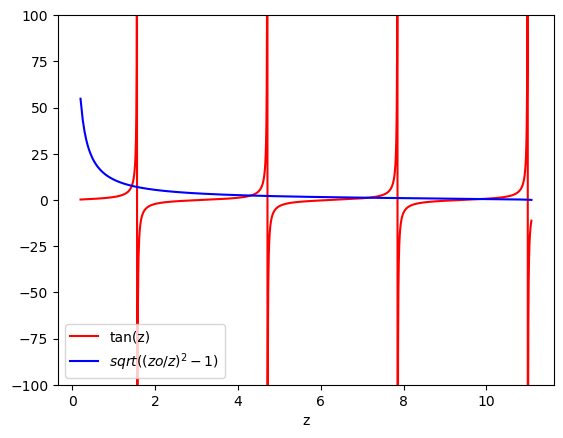

In [5]:
Vo = 3e-38 #J
E = np.linspace(0.001e-38,Vo-1e-46,s) #J
N = 50
zo = (a/hbar)*np.sqrt(m*Vo/2)

def k(Energy_array): #Finds an array of wave numbers k
    k = np.sqrt(2*m*(abs(Energy_array))/hbar**2)
    return k
zrange = k(E)*a/2
def y1(Energy_array): 
    z = (np.sqrt(2*m*(abs(Energy_array))/hbar**2)*a)/2
    y1 = np.tan(z)
    return y1
def y2(Energy_array, Vo = Vo):
    z = (np.sqrt(2*m*(Energy_array)/hbar**2)*a)/2
    zo = (a/hbar)*np.sqrt(m*Vo/2)
    y2 = np.sqrt((zo/z)**2 - 1)
    return y2


plt.plot(zrange, y1(E), color = "red", label = "tan(z)")
plt.plot(zrange, y2(E), color = "blue", label = "$sqrt((zo/z)^2-1)$")
plt.xlabel("z")
ax = plt.gca()
#ax.set_xlim(zrange[0], zrange[300])
ax.set_ylim([-100, 100])
plt.legend()

In [6]:
Vo = 3e-38 #J
E = np.linspace(0.001e-38,Vo-1e-46,s) #J

z_test = np.sqrt(2*m*(E)/hbar**2)*a/2
zo_test = (a/hbar)*np.sqrt(m*Vo/2)
error_count = 0
index_count = []
for i in range(len(z_test)):
    #print((zo_test/z_test[i])**2)
    if (zo_test/z_test[i])**2 < 1:
        error_count += 1
        index_count.append(i)
print(error_count, index_count)

0 []


# 2.  Plot and code for Energy Eq difference

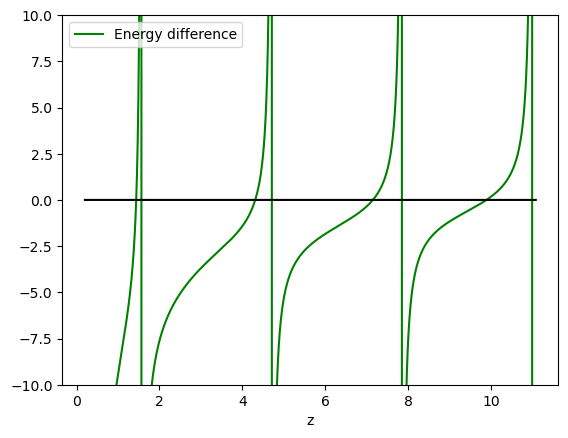

In [8]:
Vo = 3e-38 #J
E = np.linspace(0.001e-38,Vo-1e-46,s) #J

def y_diff(z_array, Vo = Vo):
    zo_ydiff = (a/hbar)*np.sqrt(m*Vo/2)
    y_diff = (np.tan(z_array) - np.sqrt((zo_ydiff/z_array)**2 - 1))
    return y_diff
Zeros = np.zeros(s)

plt.plot(zrange,y_diff(zrange), color = 'green', label = 'Energy difference')
plt.plot(zrange,Zeros, color = 'black')
plt.xlabel("z")
ax = plt.gca()
#ax.set_xlim(zrange[2000], zrange[2300])
ax.set_ylim([-10, 10])
plt.legend()

In [9]:
zeros = []
zero_index = []
tol = 1e-8
for i in range(len(y_diff(E))):
    if np.abs(y_diff(E)[i]) < tol:
        zeros.append(y_diff(E)[i])
        zeros_index.append(i)
print(zeros, zero_index)

[] []


# 3.  Root finder

In [11]:
def bisection(f, d, b, tol=1e-6):
    """
    Find a root of f(x) in the interval a<x<b, using bisection search.

    A valid interval must have a < b, and f(a) and f(b) must have opposite signs.

    Returns: 
        A root of x0, i.e. a solution to f(x0) = 0.

    Args:
        f: function to be studied; should take one argument.
        a: lower end of search interval
        b: upper end of search interval

        tol: error tolerance for result (default: 1e-6)

     If either f(d) or f(b) is zero, then we already have a solution! """
    
    if f(d) == 0:
        return a
    if f(b) == 0:
        return b

    # Spot check for valid interval
    assert b>d
    if f(b) / f(d) > 0:
        return 'invalid interval'

    while (b-d) > tol:
        c = (d+b)/2
        if f(c) / f(d) < 0:
            # c and a have opposite sign: new interval is [d,c]
            b = c
        elif f(c) / f(b) < 0:
            # c and b have opposite sign: new interval is [c,b]
            d = c
        else:
            # Only other possibility is that f(c) was exactly zero!
            return c
    else:
        return (d+b)/2  # Think: why not `return c`?

def Eigenvalues(z_zeros):
    E = []
    for i in range(len(z_zeros)):
        k_sq = ((2*z_zeros[i])/a)**2
        Energy = (k_sq*hbar**2)/(2*m)
        E.append(Energy)
    return E



In [12]:
four_Energy_zs = [bisection(y_diff,1.40,1.45),bisection(y_diff,4,4.5),bisection(y_diff,6,7.5),bisection(y_diff,9,10.5)]
four_Energy_Eigenvalues = Eigenvalues(four_Energy_zs)

print(four_Energy_zs)
print(four_Energy_Eigenvalues)

[1.4404735565185547, 4.312754154205322, 7.152589917182922, 9.892741799354553]
[5.0664516507364295e-40, 4.5415356390853143e-39, 1.2491654809214792e-38, 2.389608038458378e-38]


# 4. Root finding iterator for a given Energy array, Vo fixed

In [14]:
step = 0.01
ao = step
bo = 2*step
#E_max = max(Vo_R) - 1e-46
#zmax_well = k(E_max)*a/2

def iterator(f, zmax = 14.5):
    zz_vals = []
    zz_interval = []
    float_index = 0
    
    for i in range(s):
        A = ao + i*step
        B = bo + i*step
        if B > zmax:
            break
        maybe_zero = bisection(f, d=A, b=B)
        if type(maybe_zero) == float:
            float_index += 1
            if float_index % 2 == 0:
                zz_vals.append('false zero')
                zz_interval.append(('invalid interval'))
            else:   
                zz_vals.append(maybe_zero)
                zz_interval.append([ao + i*step,bo + i*step]) 
   
    zs_and_intervals = []
    j = 0
    while j < len(zz_vals):
        if type(zz_vals[j]) == float:
            zs_and_intervals.append(zz_vals[j])
        j += 1
    
    return zs_and_intervals

print(iterator(y_diff, max(zrange)))


[1.4404733276367188, 4.312754211425782, 7.152589416503906, 9.892741394042972]


In [15]:
quality_check = []
interference_Energy = []
for i in range(len(four_Energy_zs)):
    dif = four_Energy_zs[i] - iterator(y_diff, max(zrange))[i]
    quality_check.append(dif)

print(quality_check)

[2.2888183592861822e-07, -5.7220459481754915e-08, 5.006790164685526e-07, 4.053115816304853e-07]


# 5. Matching with the well

In [17]:
#KE = 0.5e-38 
#Vo_R = np.linspace(-5e-38,-1e-50,s)
#E_particle = np.linspace(0.5e-38,0.5e-38,s)

#zo_Vot = []
#zrange_t = []
#Q = []
#possible_E = []
#error_count = 0
#for i in range(4998):
 #   zo_Vot = ((a/hbar)*np.sqrt(m*abs(Vo_R[i+1])/2))
  #  E_well = np.linspace(-5e-38 ,Vo_R[i+1]-1e-46,s)
   # E_max = min(E_well) - 1e-46
  #  zmax_well = k(E_max)*a/2
  #  zrange_t = (k(E_well)*a/2)[4998:0:-1]
    #print(len(zrange_t))
    #print((zo_Vot/zrange_t))
  #  for j in range(len(zrange_t)):
   #     if (zo_Vot/zrange_t[j])**2 < 1:
    #        error_count += 1
   # def y_diff_R1(z):
    #     y_diff = (np.tan(z) - np.sqrt((zo_Vot/z)**2 - 1))
     #    return y_diff
   # plt.plot(zrange_t, y_diff_R1(zrange_t))
   # Q.append(iterator(y_diff_R1,zmax_well))
#print(Q)

#print(error_count)
#for z_list in Q:
   # possible_E += E_from_z(z_list)
#print(possible_E)


#x = np.linspace(0,
#plt.plot(z
#print(Q)
#print(possible_E)
#E_diff = max(Eo) - possible_E
#print(max(E_diff))
#E_diff.sort
#print(E_diff[:10])

#possible_E.sort(reverse=True)
#print(f'The ten largest energy eigenstates correspond to energy levels at {possible_E[:10]}J')


#for i in range(len(Vo_R)):
 #   def y_diff_R(z_array):
  #      y_diff = (np.tan(zrange_t[i]) - np.sqrt((zo_Vot[i]/zrange_t[i])**2 - 1))
   #     return y_diff
  #  plt.plot(zrange_t[i],y_diff_R(zrange_t[i]), label = f"ydiff{i}")

#plt.plot(zrange_t[7],Zeros, color = 'black')
#plt.xlabel("z")
#plt.ylabel("y diff")
#ax = plt.gca()
#ax.set_ylim(-2, 2)
#ax.set_xlim(zrange_t[7][250],zrange_t[7][500])
#ax.set_xlim(zrange_t[7][2800],zrange_t[7][3100])
#plt.legend()

In [18]:
assert 1 == 2

AssertionError: 

In [ ]:
Eo = np.linspace(0.15e-38,0.15e-38,s) #J
Vo_rising = np.linspace(-5e-38,0,s) #J

#k_well = np.sqrt((2*m*Eo)/(hbar**2)) #electron wave number
q_well = np.sqrt((2*m*(Eo-Vo_rising))/(hbar**2)) #in well wave number

k_well = k(Eo)


R_w = (j*np.exp(-2*j*k_well*a))*((q_well**2 - k_well**2)*np.sin(2*q_well*a))/((2*k_well*q_well*np.cos(2*q_well*a)) + -1*j*(q_well**2 + k_well**2)*np.sin(2*q_well*a))
T_w = (2*k_well*q_well)/((2*k_well*q_well*np.cos(2*q_well*a)) + -1*j*(q_well**2 + k_well**2)*np.sin(2*q_well*a))
print((np.abs(T_w))**2)

mag_B_sq = (k_well/q_well)*(np.abs(R_w)**2 + np.abs(T_w)**2 - 1)
mag_A_sq = (k_well/q_well)*(1 - np.abs(R_w)**2) + mag_B_sq

T_sq = (np.abs(T_w))**2

plt.plot(Vo_rising, T_sq, color='red', label='|T|^2')
#plt.plot(Vo_rising, (np.abs(R_w))**2, color='blue', linestyle='dashed', label='|R|^2')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
ax = plt.gca()
#ax.set_xlim(Vo_rising[2000],Vo_rising[3100])
#ax.set_ylim(0, 0.5)


In [ ]:
Q = []
possible_E = []
error_count = 0
for i in range(len(Vo_T)):
    zo_Vot = (a/hbar)*np.sqrt(m*abs(Vo_T[i])/2)
    #print(zo_Vot)
    E_well = np.linspace(Vo_T[i]+1e-40,-1e-60,s)
    #print(E_well)
    E_max = min(E_well) - 1e-46
    zmax_well = k(E_max)*a/2
    #print(zmax_well)
    zrange_t = (k(E_well)*a/2)[::-1]
    print((zo_Vot/zrange_t)**2)
    def y_diff_RT(z):
        y_diff = (np.tan(z) - np.sqrt((zo_Vot/z)**2 - 1))
        return y_diff
    plt.plot(zrange_t,y_diff_RT(zrange_t), label = f'Vo = {round((Vo_T[i]*10**38),2)}')
    for j in range(s):
        if ((zo_Vot/zrange_t[j])**2 - 1) < 0:
            error_count += 1
    Q.append(iterator(y_diff_RT, zmax_well))
    #print(Q[i])

print(error_count)
q0 = Q[0][0:5]
q1 = Q[1][0:5]
q2 = Q[2][0:4]
q3 = Q[3][0:4]
q4 = Q[4][0:3]
q5 = Q[5][0:3]
q6 = Q[6][0:2]
q7 = Q[7][0:2]
q8 = Q[8][0:1]
#print(q2)

possible_E.append(max(Eigenvalues(q0)))
possible_E.append(max(Eigenvalues(q1)))
possible_E.append(max(Eigenvalues(q2)))
possible_E.append(max(Eigenvalues(q3)))
possible_E.append(max(Eigenvalues(q4)))
possible_E.append(max(Eigenvalues(q5)))
possible_E.append(max(Eigenvalues(q6)))
possible_E.append(max(Eigenvalues(q7)))
possible_E.append(max(Eigenvalues(q8)))

#print(possible_E)

FT = []
for i in range(len(possible_E)):
    FT.append(-1*possible_E[i])
#print(FT)


plt.plot(zrange_t,Zeros, color = 'black')
#plt.ylim(-3,3)
#plt.xlim(1,5)
plt.ylabel('y diff')
plt.xlabel('z')
plt.legend()

In [ ]:
T_max_count = 0
T_max_vals = []
T_max_indices = []
tolerance = 0.999995
#T_ss = ((np.abs(T_w))**2)

for i in range(s):
    if ((np.abs(T_w))**2)[i] > tolerance:
        T_max_count += 1
        T_max_vals.append(((np.abs(T_w))**2)[i])
        T_max_indices.append(i)

del T_max_indices[10]
del T_max_indices[9]
print(T_max_indices)

Vo_from_graph = np.linspace(-5e-38,0,s)
T_max = ((np.abs(T_w))**2)[T_max_indices]
Vo_T = Vo_from_graph[T_max_indices]
print(Vo_T)

In [ ]:
possible_Er.append(min(Eigenvalues(qr0)))
print(min(Eigenvalues(qr0)))

In [ ]:
Vo_RR = [-4.43e-38,-4e-38,-3.48e-38,3.05e-38,-2.6e-38,-2.2e-38]
Qr = []
possible_Er = []
error_count = 0
error_index = []
for i in range(len(Vo_RR)):
    zo_VotR = (a/hbar)*np.sqrt(m*abs(Vo_RR[i])/2)
    #print(zo_Vot)
    E_wellR = np.linspace(-5e-38,Vo_RR[i]-1e-60,s)
    #print(E_well)
    E_max = min(E_wellR) - 1e-46
    zmax_wellR = k(E_max)*a/2
    zrange_tR = (k(E_wellR)*a/2)[::-1]
    print(zrange_tR)
    print(zo_VotR/zrange_tR)
    def y_diff_RR(z):
        y_diff = (np.tan(z) - np.sqrt((zo_VotR/z)**2 - 1))
        return y_diff
    plt.plot(zrange_tR,y_diff_RR(zrange_tR), label = f'Vo = {round((Vo_RR[i]*10**38),2)}')
    for j in range(s):
        if ((zo_VotR/zrange_tR[j])**2 - 1) < 0:
            error_count += 1
            error_index.append([i,j])
    Qr.append(iterator(y_diff_RR,zmax_wellR))

qr0 = Qr[0][0:5]
qr1 = Qr[1][0:5]
qr2 = Qr[2][0:4]
qr3 = Qr[3][0:4]
qr4 = Qr[4][0:4]
qr5 = Qr[5][0:4]

possible_Er.append(max(Eigenvalues(qr0)))
possible_Er.append(max(Eigenvalues(qr1)))
possible_Er.append(max(Eigenvalues(qr2)))
possible_Er.append(max(Eigenvalues(qr3)))
possible_Er.append(max(Eigenvalues(qr4)))
possible_Er.append(max(Eigenvalues(qr5)))

FR = []
for i in range(len(possible_Er)):
    FR.append(-1*possible_Er[i])
#print(error_index)




print(error_count)
plt.plot(zrange_t,Zeros, color = 'black')
plt.ylim(-3,3)
#plt.xlim(1,5)
plt.ylabel('y diff')
plt.xlabel('z')
plt.legend()

In [ ]:
Eo = np.linspace(0.15e-38,0.15e-38,s) #J
Vo_rising = np.linspace(-5e-38,0,s) #J

#k_well = np.sqrt((2*m*Eo)/(hbar**2)) #electron wave number
k_well = k(Eo)
q_well = np.sqrt((2*m*(Eo-Vo_rising))/(hbar**2)) #in well wave number

R_w = (j*np.exp(-2*j*k_well*a))*((q_well**2 - k_well**2)*np.sin(2*q_well*a))/((2*k_well*q_well*np.cos(2*q_well*a)) + -1*j*(q_well**2 + k_well**2)*np.sin(2*q_well*a))
T_w = (2*k_well*q_well)/((2*k_well*q_well*np.cos(2*q_well*a)) + -1*j*(q_well**2 + k_well**2)*np.sin(2*q_well*a))

mag_B_sq = (k_well/q_well)*(np.abs(R_w)**2 + np.abs(T_w)**2 - 1)
mag_A_sq = (k_well/q_well)*(1 - np.abs(R_w)**2) + mag_B_sq

#print(FT)
plt.plot(Vo_rising, (np.abs(T_w))**2, color='red', label='|T|^2')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
ax = plt.gca()
#ax.set_xlim(Vo_rising[2000],Vo_rising[3100])
#ax.set_ylim(0, 0.5)
for i in range(len(FT)):
    plt.axvline(FT[i], linestyle = 'dashed', color = 'black')

In [ ]:
Eo = np.linspace(0.15e-38,0.15e-38,s) #J
Vo_rising = np.linspace(-5e-38,0,s) #J

k_well = np.sqrt((2*m*Eo)/(hbar**2)) #electron wave number
q_well = np.sqrt((2*m*(Eo-Vo_rising))/(hbar**2)) #in well wave number

R_w = (j*np.exp(-2*j*k_well*a))*((q_well**2 - k_well**2)*np.sin(2*q_well*a))/((2*k_well*q_well*np.cos(2*q_well*a)) + -1*j*(q_well**2 + k_well**2)*np.sin(2*q_well*a))
T_w = (2*k_well*q_well)/((2*k_well*q_well*np.cos(2*q_well*a)) + -1*j*(q_well**2 + k_well**2)*np.sin(2*q_well*a))

mag_B_sq = (k_well/q_well)*(np.abs(R_w)**2 + np.abs(T_w)**2 - 1)
mag_A_sq = (k_well/q_well)*(1 - np.abs(R_w)**2) + mag_B_sq


plt.plot(Vo_rising, (np.abs(T_w))**2, color='red', label='|T|^2')
#plt.plot(Vo_rising, (np.abs(R_w))**2, color='blue', linestyle='dotted', label='|R|^2')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
ax = plt.gca()
#ax.set_xlim(Vo_rising[2000],Vo_rising[3100])
#ax.set_ylim(0, 0.5)
for i in range(len(FR)):
    plt.axvline(FR[i], linestyle = 'dashed', color = 'black')